## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

## Import data

In [2]:
creditcard_data=pd.read_csv('/content/customer_segmentation_data.csv')

In [3]:
creditcard_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Data Cleaning

In [4]:
creditcard_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Fnding the missing values and replacing them

In [5]:
creditcard_data.loc[(creditcard_data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_data['CREDIT_LIMIT'].mean()

In [6]:
creditcard_data.loc[(creditcard_data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_data['MINIMUM_PAYMENTS'].mean()

In [7]:
creditcard_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Checking the duplicate entries

In [8]:
creditcard_data.duplicated().sum()

0

## Dropping the object entries

In [9]:
creditcard_data.drop('CUST_ID', axis=1,inplace=True)

In [10]:
creditcard_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Correlation matrix between the features

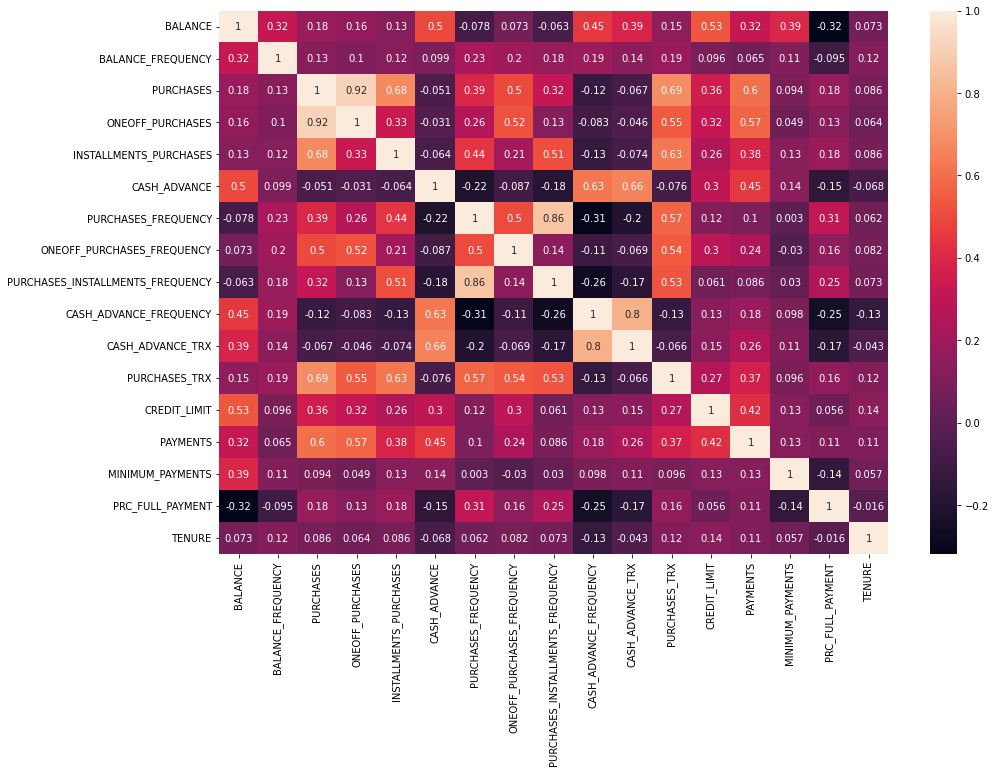

In [11]:
correlations=creditcard_data.corr()
f,ax=plt.subplots(figsize=(15,10)) #increase the size of correlation matrix
sns.heatmap(correlations,annot=True)

## Feature scaling

In [12]:
sc=StandardScaler()
creditcard_data_s=sc.fit_transform(creditcard_data)

In [13]:
creditcard_data_s.shape

(8950, 17)

In [14]:
creditcard_data_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Building the clustering model and calculating the values of the Distortion and Inertia

In [15]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 18)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(creditcard_data_s)
    kmeanModel.fit(creditcard_data_s)
  
    distortions.append(sum(np.min(cdist(creditcard_data_s, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / creditcard_data_s.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(creditcard_data_s, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / creditcard_data_s.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [16]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.5250833258342467
2 : 3.1441766818831605
3 : 3.0278803322985692
4 : 2.8188765488862138
5 : 2.717683032205842
6 : 2.562581394296074
7 : 2.4666630853418385
8 : 2.4084323499994937
9 : 2.3785176860893773
10 : 2.3386239951880414
11 : 2.2666758272226164
12 : 2.2302346422967045
13 : 2.19368723340427
14 : 2.156743453760321
15 : 2.133765385505065
16 : 2.102327205652703
17 : 2.0589955795564285


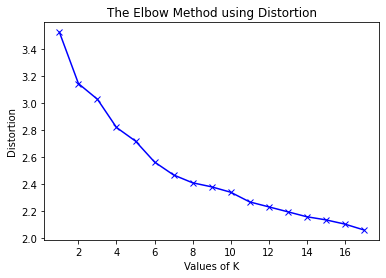

In [17]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [18]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 152149.99999999983
2 : 127785.04965248298
3 : 111986.7227089619
4 : 99073.93826774803
5 : 91502.53365001426
6 : 84852.59400226288
7 : 79527.04338416774
8 : 74624.50030586252
9 : 69970.68141878636
10 : 66466.44002236176
11 : 63638.32252024388
12 : 61374.769351342635
13 : 59151.751803911044
14 : 57498.8435649512
15 : 55927.91270444068
16 : 54270.81730148001
17 : 53278.87342376859


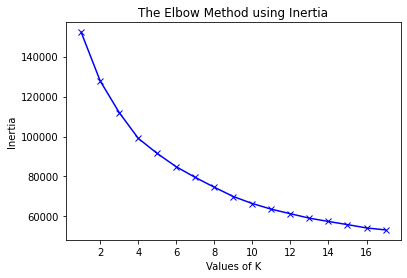

In [19]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Applying K-means Algorithm

In [20]:
kmeans=KMeans(7)
kmeans.fit(creditcard_data_s)
label=kmeans.labels_

In [21]:
kmeans.cluster_centers_.shape

(7, 17)

In [22]:
#we will make a dataframe of cluster centres
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.005560,0.402362,-0.343626,-0.224784,-0.399422,-0.105383,-0.809941,-0.335341,-0.752808,0.083302,-0.042447,-0.464486,-0.302448,-0.248996,-0.016184,-0.452417,0.272274
1,0.136572,0.430310,0.947113,0.899078,0.587655,-0.306345,1.095122,1.866467,0.542439,-0.407626,-0.316631,1.210042,0.708502,0.398264,-0.032863,0.455933,0.307809
2,-0.701870,-2.137043,-0.307368,-0.230794,-0.302643,-0.320571,-0.548545,-0.429290,-0.441853,-0.521502,-0.376652,-0.416952,-0.170903,-0.192388,-0.257109,0.297197,0.199658
3,-0.335410,-0.341582,-0.283994,-0.209054,-0.287071,0.066403,-0.193767,-0.272626,-0.226075,0.303329,-0.002270,-0.384892,-0.551431,-0.389121,-0.209952,0.012044,-3.190495
4,-0.372575,0.330236,-0.041386,-0.233843,0.331585,-0.369357,0.979839,-0.354295,1.171303,-0.478660,-0.363206,0.169977,-0.281545,-0.224580,-0.029161,0.309079,0.254140
5,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
6,1.669907,0.396664,-0.206391,-0.150793,-0.211058,1.985883,-0.456318,-0.192482,-0.403785,1.906684,1.917078,-0.244531,1.007765,0.817118,0.551687,-0.395277,0.068788


In [23]:
cluster_centers=sc.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[creditcard_data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1576.047737,0.972586,269.043158,219.341894,49.875518,757.877539,0.165282,0.102419,0.065252,0.151814,2.959155,3.164437,3394.019953,1012.323957,826.491440,0.021390,11.881690
1,1848.737020,0.979207,3026.727264,2084.722052,942.476910,336.451570,0.929876,0.759261,0.580017,0.053574,1.088050,44.786950,7072.269868,2886.079513,787.621440,0.287067,11.929245
2,103.592603,0.371025,346.507870,209.366675,137.391027,306.619748,0.270193,0.074392,0.188834,0.030786,0.678451,4.345960,3872.634212,1176.198284,265.024974,0.240640,11.784512
3,866.346588,0.796353,396.446254,245.449794,151.472651,1118.121121,0.412583,0.121128,0.274589,0.195843,3.233333,5.142857,2488.118174,606.676652,374.921780,0.157237,7.247619
4,788.991029,0.955501,914.783954,204.305742,710.915879,204.311648,0.883607,0.096765,0.829943,0.039360,0.770211,18.934836,3470.073592,1083.006164,796.248703,0.244115,11.857423
5,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
6,5040.244957,0.971237,562.248281,342.151127,220.210625,5143.359531,0.307208,0.145037,0.203963,0.516691,16.331473,8.631696,8161.109984,4098.619427,2149.888967,0.038103,11.609375


In [24]:
label.shape

(8950,)

In [25]:
label.max()

6

In [26]:
label.min()

0

In [27]:
y=kmeans.fit_predict(creditcard_data_s)
y

array([4, 3, 0, ..., 6, 6, 6], dtype=int32)

In [28]:
creditcard_data_cluster=pd.concat([creditcard_data,pd.DataFrame({'cluster':label})],axis=1)
creditcard_data_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


## PRINCIPAL COMPONENT ANALYSIS TO UNDERSTAND OUTPUT

In [29]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_data_s)
principal_comp

array([[-1.6822206 , -1.07644978],
       [-1.13829812,  2.50648592],
       [ 0.96968131, -0.38350341],
       ...,
       [-0.92620235, -1.81079   ],
       [-2.33654909, -0.6579774 ],
       [-0.55642154, -0.40046833]])

In [30]:
pca_dataset=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_dataset

,pca1,pca2
0,-1.682221,-1.076450
1,-1.138298,2.506486
2,0.969681,-0.383503
3,-0.873629,0.043169
4,-1.599433,-0.688582
...,...,...
8945,-0.359628,-2.016149
8946,-0.564368,-1.639126
8947,-0.926202,-1.810790
8948,-2.336549,-0.657977


In [31]:
pca_dataset=pd.concat([pca_dataset,pd.DataFrame({'cluster':label})],axis=1)
pca_dataset

,pca1,pca2,cluster
0,-1.682221,-1.076450,0
1,-1.138298,2.506486,6
2,0.969681,-0.383503,1
3,-0.873629,0.043169,0
4,-1.599433,-0.688582,0
...,...,...,...
8945,-0.359628,-2.016149,3
8946,-0.564368,-1.639126,3
8947,-0.926202,-1.810790,3
8948,-2.336549,-0.657977,3


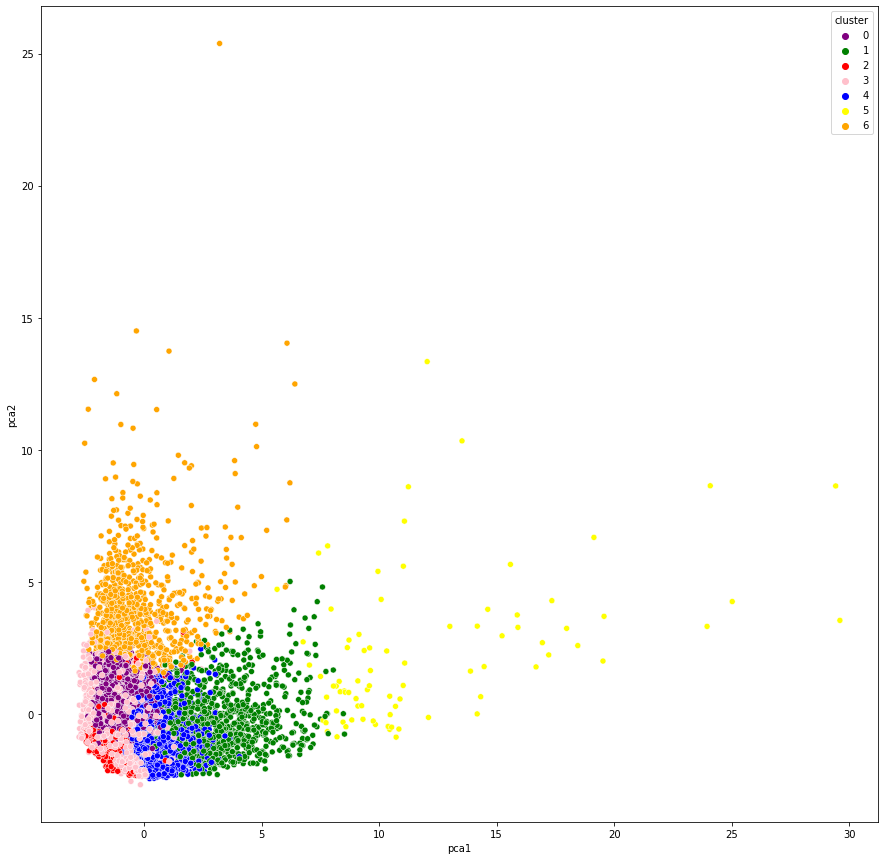

In [32]:
plt.figure(figsize=(15,15))
ax=sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_dataset, palette=['purple','green','red','pink','blue','yellow','orange'])
plt.show()